In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import os
import cv2 as cv
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
DIR = "/content/drive/MyDrive/Waste_Classification"
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(DIR, validation_split=0.2, subset="training", seed=42, batch_size=128, smart_resize=True, image_size=(224, 224))
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(DIR, validation_split=0.2, subset="validation", seed=42, batch_size=128, smart_resize=True, image_size=(224, 224))

Found 1176 files belonging to 8 classes.
Using 941 files for training.
Found 1176 files belonging to 8 classes.
Using 235 files for validation.


In [ ]:
classes = train_dataset.class_names
numClasses = len(train_dataset.class_names)
print(classes)
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

['Aluminium', 'Glass', 'Organic Waste', 'Other Plastics', 'Paper and Cardboard', 'Plastic', 'Textiles', 'Wood']


In [ ]:
baseModel = tf.keras.applications.MobileNetV3Large(input_shape=(224, 224,3), weights='imagenet', include_top=False, classes=numClasses)
for layers in baseModel.layers[:-6]:
  layers.trainable=False

last_output = baseModel.layers[-1].output
x = tf.keras.layers.Dropout(0.45) (last_output)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.BatchNormalization() (x)
x = tf.keras.layers.Dense(256, activation = 'relu'(x)
x = tf.keras.layers.Dropout(0.45) (x)
x = tf.keras.layers.Dense(numClasses, activation='softmax')(x)

model = tf.keras.Model(inputs=baseModel.input,outputs=x)

12697600/12683000 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer='Adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

epochs = 50
history = model.fit(train_dataset, validation_data=test_dataset, epochs=epochs)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 129s 4s/step - loss: 384.6344 - accuracy: 0.3135 - val_loss: 325.0254 - val_accuracy: 0.5574
Epoch 2/50
8/8 [==============================] - 6s 328ms/step - loss: 290.6086 - accuracy: 0.6738 - val_loss: 242.7645 - val_accuracy: 0.7021
Epoch 3/50
8/8 [==============================] - 6s 325ms/step - loss: 214.6548 - accuracy: 0.8172 - val_loss: 176.3118 - val_accuracy: 0.7830
Epoch 4/50
8/8 [==============================] - 6s 326ms/step - loss: 153.9143 - accuracy: 0.8735 - val_loss: 123.7812 - val_accuracy: 0.8000
Epoch 5/50
8/8 [==============================] - 6s 329ms/step - loss: 106.4365 - accuracy: 0.8852 - val_loss: 83.4830 - val_accuracy: 0.8298
Epoch 6/50
8/8 [==============================] - 6s 325ms/step - loss: 70.5669 - accuracy: 0.9001 - val_loss: 53.7426 - val_accuracy: 0.8723
Epoch 7/50
8/8 [==============================] - 6s 326ms/step - loss: 44.5459 - accuracy: 0.9150 - val_loss: 32.7776 - val_accuracy: 0.8809
Epoch 8/5

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling[0][0]']              
                                )                                                                 
                                                                                              

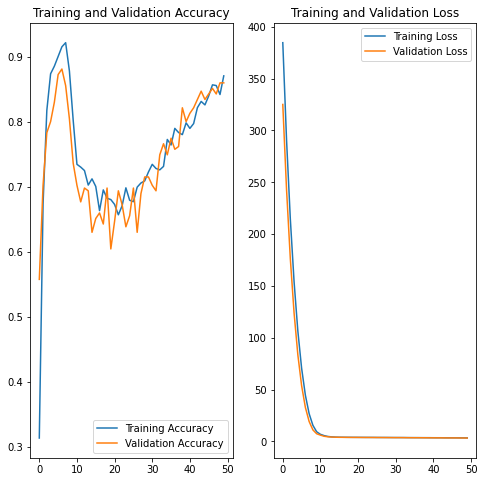

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
path = "/content/img.jpg"

img = tf.keras.preprocessing.image.load_img(path, target_size=(256, 256))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) 

predictions = model.predict(img_array)